<a href="https://colab.research.google.com/github/sumitha9020/Elevatelabs_Tasks/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

--- First 5 Rows ---
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4

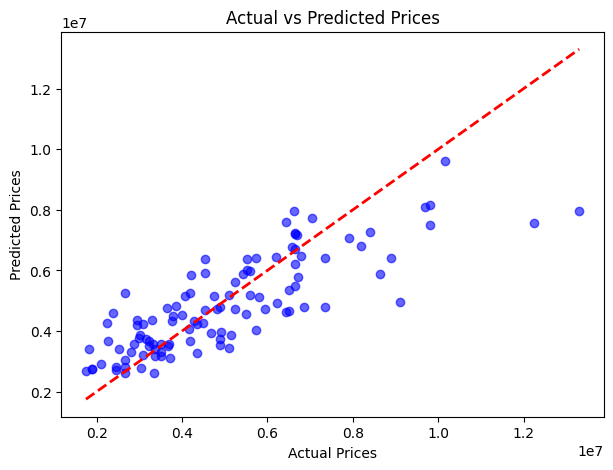

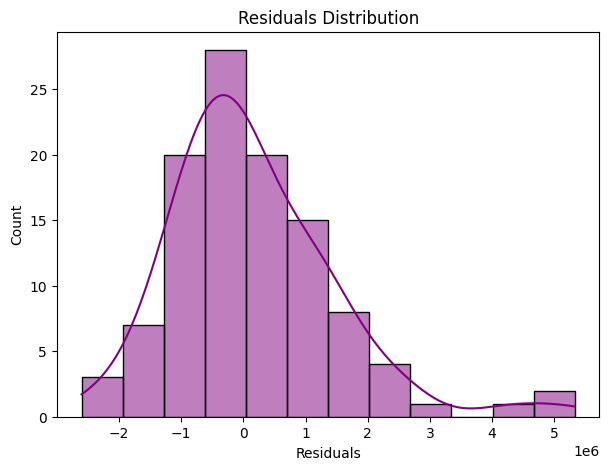


--- Coefficients ---
                            Feature   Coefficient
2                         bathrooms  1.094445e+06
9               airconditioning_yes  7.914267e+05
8               hotwaterheating_yes  6.846499e+05
10                     prefarea_yes  6.298906e+05
3                           stories  4.074766e+05
7                      basement_yes  3.902512e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
4                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05

--- Key Insights ---
1. Positive coefficients indicate features that increase house price.
2. Negative coefficients indicate features that decrease house price.
3. R² shows how much variance in house prices is explained by the model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load Dataset
data = pd.read_csv("/content/Housing.csv")

print("--- Dataset Info ---")
print(data.info())
print("\n--- First 5 Rows ---")
print(data.head())

# 2. Preprocessing

# Convert categorical columns to numeric (One-hot encoding)
data = pd.get_dummies(data, drop_first=True)

# Handle missing values
print("\n--- Missing Values ---")
print(data.isnull().sum())
data = data.dropna()

# Features and target
X = data.drop("price", axis=1)
y = data["price"]

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


# 5. Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 6. Visualization
# Actual vs Predicted Prices
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Residuals Distribution
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

# 7. Coefficients Interpretation
coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\n--- Coefficients ---")
print(coeff_df.sort_values(by="Coefficient", ascending=False))

print("\n--- Key Insights ---")
print("1. Positive coefficients indicate features that increase house price.")
print("2. Negative coefficients indicate features that decrease house price.")
print("3. R² shows how much variance in house prices is explained by the model.")
